<a href="https://colab.research.google.com/github/ganeshghadge2772/Hotel_Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project_Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import required libraries

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
# loading dataframe
hotel_df = pd.read_csv('/content/drive/MyDrive/Almabetter/EDA_Project/Hotel Bookings.csv')

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
list(hotel_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

## Handling the Null values
####In some columns values are missing (NAN value) But before move forword for analysis we have to fill those null values or delete column which contains high amount of null values for getting better insights from Data.

In [ ]:
# sum of null values in each column
hotel_df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# lets try to find out percentage of null values present in columns
def percent_null_values(hotel_df):
  nan_percent = (hotel_df.isnull().sum()/len(hotel_df))*100
  nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False)
  return nan_percent
percent_null_values(hotel_df)

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

#### Company and agent Column has 94 % of Null values so its not feasible to fill that much null values so its better to drop this column.

In [ ]:
# Drop the company column
hotel_df.drop(['company','agent'], axis = 1, inplace = True)

In [ ]:
# Country column contains the country codes of the guests, it is categorical feature so we will also replace it with the mode value.
hotel_df['country'] = hotel_df['country'].fillna(hotel_df.country.mode().to_string())

In [ ]:
# dropping the rows with null values of children column completely
hotel_df = hotel_df.dropna(axis=0)

In [ ]:
# again check sum of null values in each column
hotel_df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

##### From the describe() function used earlier we spotted something fishy. The minimum value of adults column is zero. While it is possible that there are bookings with children only it is better to check those data carefully.Dataset might contain bookings with zero adults,childrens.

In [ ]:
# Check Bookings with zero adults
zero_adults = hotel_df[hotel_df.adults == 0]

In [ ]:
# checking the shape of zero_adults
zero_adults.shape

(403, 30)

##### From above discussion We come to know that atleast a few of those data with zero adults have both children and babies zero as well. Which would imply that the total number of guests are zero and That does not make any sense. These data has to be considered as incorrect and will have to be dropped.It will be better to make a new column where these three categories are added together as 'all_guests' as compared to remove from data.

In [ ]:
# create new column with all_guest
hotel_df['all_guests'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

In [ ]:
# check value counts for all_guest
hotel_df['all_guests'].value_counts()

2.0     82048
1.0     22581
3.0     10494
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: all_guests, dtype: int64

##### From above information we can see that we have total 170 observation with zero guest and its not make any sense so that We will drop all the data with zero total guests

In [ ]:
# drop observation with zero adults
hotel_df.drop(hotel_df[hotel_df['all_guests']==0].index , inplace =  True)

In [ ]:
# viewing those rows with zero all_guests (to confirm)
hotel_df[hotel_df.all_guests == 0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,all_guests


In [ ]:
# data type changes from float to integer
hotel_df[['children']] = hotel_df[['children']].astype('int64')

# EDA

### For this analysis we have to consider only those bookings which was not canceled

In [ ]:
# select the bookings which was not cancelled
confirm_bookings = hotel_df[hotel_df['is_canceled']==0]

### Types of hotel in the dataset and most preffered among those by the customers

In [ ]:
hotel_preffered = confirm_bookings['hotel'].value_counts()
hotel_preffered

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

In [ ]:
# Percentage of hotels preffered.
confirm_bookings['hotel'].value_counts(normalize=True)*100

City Hotel      61.436323
Resort Hotel    38.563677
Name: hotel, dtype: float64

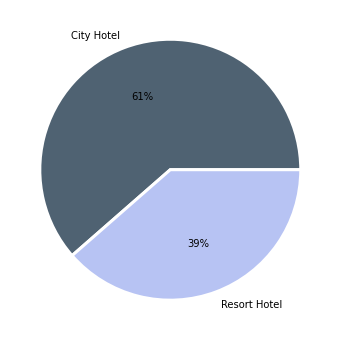

In [ ]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
# pie chart
plt.figure(figsize=(8,6))
plt.pie(hotel_preffered,labels=['City Hotel','Resort Hotel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### From overall bookings around 61% of bookings came for City type hotel and 39% for Resort type Hotel

### Number of bookings canceled across both the type of hotels and its Percentages of cancellation

In [ ]:
# check the number of bookings which cancelled 
cancel_count = hotel_df['is_canceled'].value_counts()
cancel_count

0    75011
1    44195
Name: is_canceled, dtype: int64

In [ ]:
# Percentage of bookings were cancelled
percentage_count = (hotel_df['is_canceled'].value_counts()/hotel_df.shape[0])*100
percentage_count

0    62.925524
1    37.074476
Name: is_canceled, dtype: float64

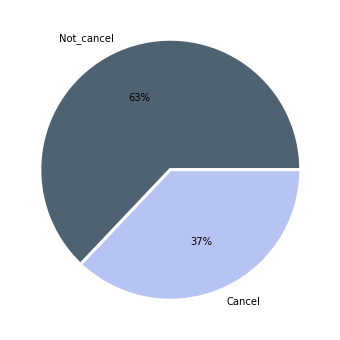

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(percentage_count,labels=['Not_cancel','Cancel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### From Total number of bookings around 37% of bookings wew cancelled and confirm bookings was 63%

In [ ]:
# cancelled bookings by each hotel type using group by function
cancelled_hotel_type=hotel_df.groupby(['hotel'])['is_canceled'].sum()
cancelled_hotel_type

hotel
City Hotel      33075
Resort Hotel    11120
Name: is_canceled, dtype: int64

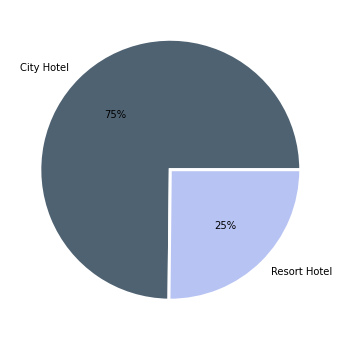

In [ ]:
# pie chart
plt.figure(figsize=(8,6))
plt.pie(cancelled_hotel_type,labels=['City Hotel','Resort Hotel'],autopct='%.0f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)
plt.show()

##### 1) From above chart we can see that cancelling rate is 75% in City hotel
##### 2) Cancelling rate in Resort hotel is less as compared to city hotel

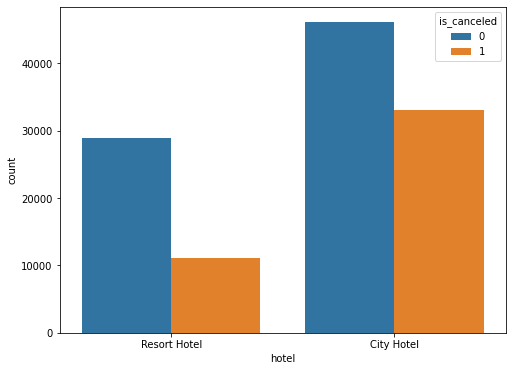

In [ ]:
# Count plot for showing status of cancellation for each hotel type
plt.figure(figsize=(8,6))
sns.countplot(x='hotel',hue='is_canceled',data=hotel_df)
plt.show()

### What are the most trending months for hotel booking?

In [ ]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
# arranging hotel bookings according to month index
booking_by_month = confirm_bookings['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month

January      4115
February     5359
March        6620
April        6560
May          7103
June         6395
July         7907
August       8624
September    6385
October      6901
November     4651
December     4391
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Number of Bookings in each Months')

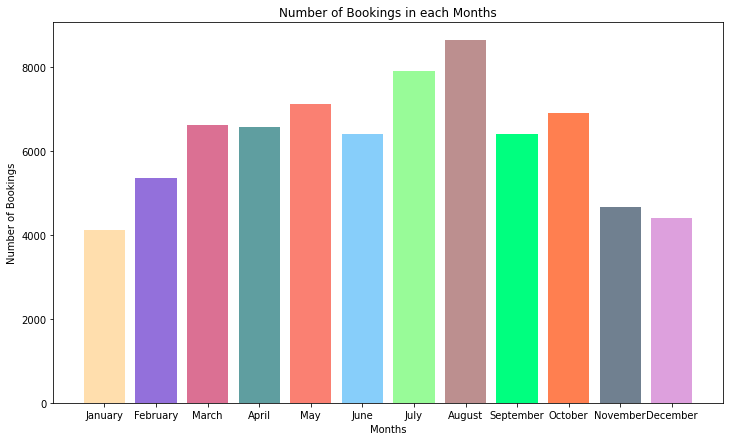

In [ ]:
# Bar plot for months vs Number of Bookings
x_axis_data = booking_by_month.index
y_axis_data = booking_by_month
plt.figure(figsize=(12,7))
plt.bar(x_axis_data,y_axis_data, color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings in each Months')

### Monthly bookings by each type of Hotels

In [ ]:
# Bookings with City Hotel
city_hotel_bookings = confirm_bookings[confirm_bookings['hotel'] == 'City Hotel']
# Bookings with Resort Hotel
Resort_hotel_bookings = confirm_bookings[confirm_bookings['hotel'] == 'Resort Hotel']

In [ ]:
city_hotel_booking_by_month = city_hotel_bookings ['arrival_date_month'].value_counts().reindex(month_index)
city_hotel_booking_by_month

January      2249
February     3051
March        4049
April        4010
May          4568
June         4358
July         4770
August       5367
September    4283
October      4326
November     2676
December     2377
Name: arrival_date_month, dtype: int64

In [ ]:
Resort_hotel_booking_by_month =Resort_hotel_bookings['arrival_date_month'].value_counts().reindex(month_index)
Resort_hotel_booking_by_month

January      1866
February     2308
March        2571
April        2550
May          2535
June         2037
July         3137
August       3257
September    2102
October      2575
November     1975
December     2014
Name: arrival_date_month, dtype: int64

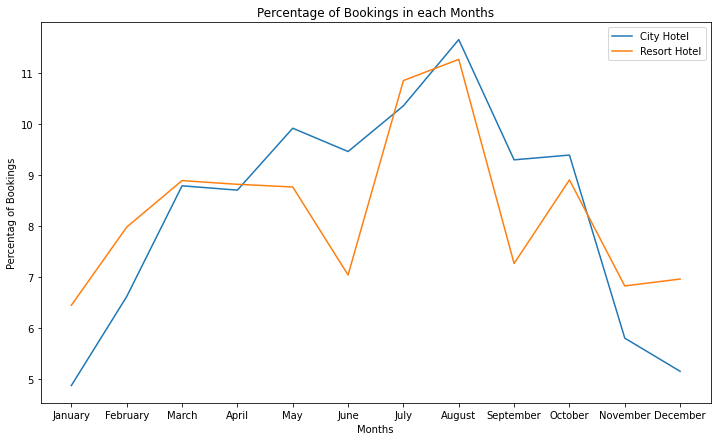

In [ ]:
# x_axis values 
city_x_axis_data = city_hotel_booking_by_month.index
resort_x_axis_data = Resort_hotel_booking_by_month.index
# y_axis values(here we calculate % of bookings of city & resort hotel in each month )
city_y_axis_data =(city_hotel_booking_by_month/city_hotel_booking_by_month.sum())*100
resort_y_axis_data =(Resort_hotel_booking_by_month/Resort_hotel_booking_by_month.sum())*100
plt.figure(figsize=(12,7))
plt.plot(city_x_axis_data,city_y_axis_data, label = 'City Hotel')
plt.plot(resort_x_axis_data,resort_y_axis_data,label = 'Resort Hotel')
plt.xlabel('Months')
plt.ylabel('Percentag of Bookings')
plt.title('Percentage of Bookings in each Months')
plt.legend()
plt.show()

### Number of Bookings across Arrival_date_year

In [ ]:
# Number of Bookings in each year
confirm_bookings['arrival_date_year'].value_counts()

2016    36299
2017    24886
2015    13826
Name: arrival_date_year, dtype: int64

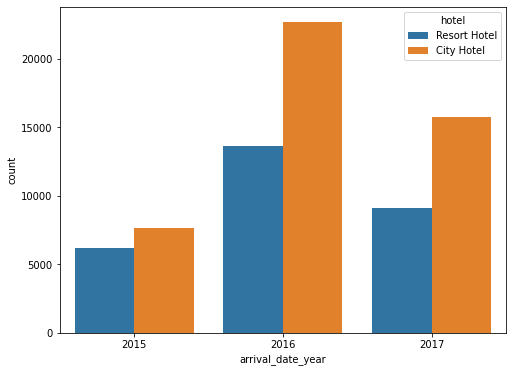

In [ ]:
# countplot for number of bookings per month in each year comparison with hotels
plt.figure(figsize=(8,6))
sns.countplot(x='arrival_date_year',hue='hotel',data=confirm_bookings)
plt.show()

### What is the relationship between lead time and cancellation?

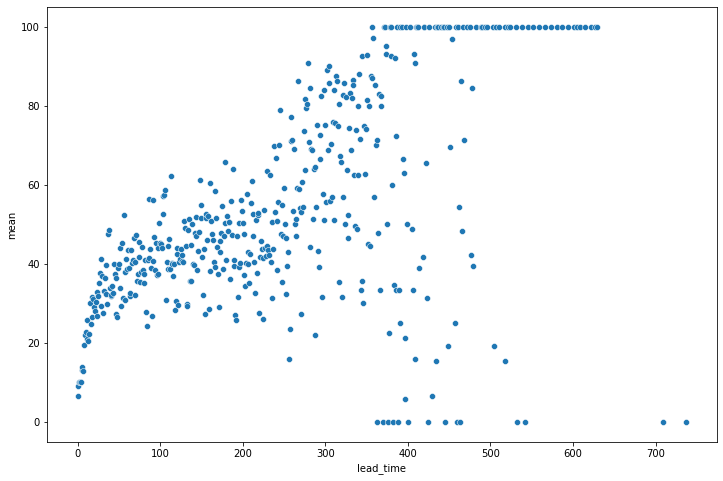

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
a = hotel_df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

#### It can be observed that lead time has a positive correlation with cancellation

### Hotel Bookings across the contries

In [ ]:
# Number of bookings fro each country store in one variable
get_count= confirm_bookings['country'].value_counts() 

In [ ]:
# Top 15 counties which has highest amount of hotel bookings
get_count.head(15)

PRT    20977
GBR     9668
FRA     8468
ESP     6383
DEU     6067
IRL     2542
ITA     2428
BEL     1868
NLD     1716
USA     1592
BRA     1392
CHE     1298
AUT     1033
CN      1025
SWE      793
Name: country, dtype: int64

In [ ]:
Bookings_from_country = get_count.head(15)
country_names = ['Portugal','United Kingdom','France','Spain','Germany','Ireland','Italy','Belgium','Netherlands','USA','Brazil','Switzerland','Austria','China','Sweden']

Text(0.5, 1.0, 'Hotel Bookings across the contries')

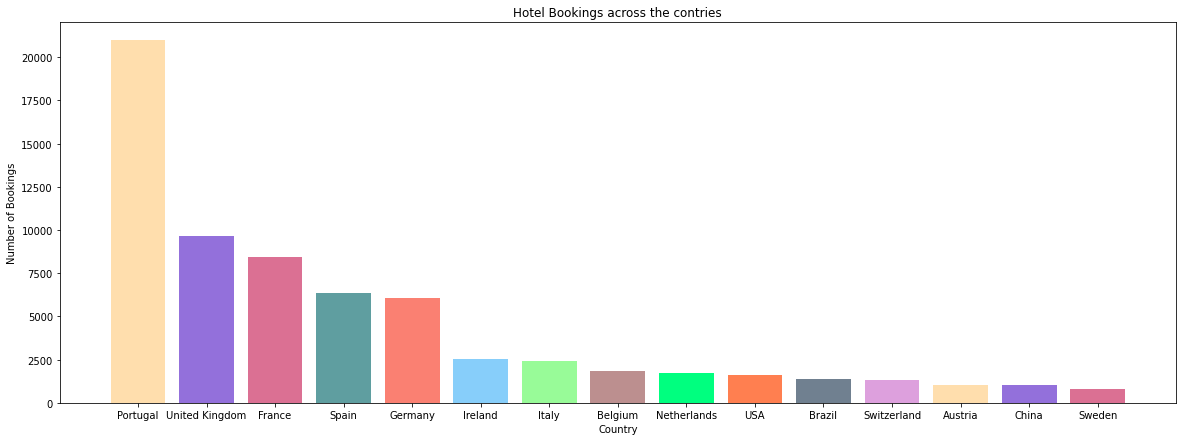

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(country_names,Bookings_from_country,color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Hotel Bookings across the contries')

In [ ]:
import plotly 
import plotly.express as px

In [ ]:
# show on map
temp = confirm_bookings['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,locations=temp['country'],color=np.log(temp['count']), hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,title="Home country of guests")

guest_map.show()

#### We can observe that most number of bookings are from Europian countries,USA,Brazil.

### Analysis on Number of waiting Days

In [ ]:
confirm_bookings['days_in_waiting_list'].value_counts().sort_values(ascending = False)

0      73677
58       164
87        76
63        51
122       51
       ...  
167        1
10         1
121        1
21         1
23         1
Name: days_in_waiting_list, Length: 97, dtype: int64

In [ ]:
# Hotel bookings having zero waiting time(in days)
non_waiting_bookings =confirm_bookings[confirm_bookings['days_in_waiting_list'] == 0]

In [ ]:
# Number of hotel bookings having waiting time greater than equal to 1 days
waiting_bookings = confirm_bookings[confirm_bookings['days_in_waiting_list'] >= 1]

In [ ]:
# Calculate Percentage of hotel bookings having zero waiting time
percentage_of_non_waiting_bookings = (non_waiting_bookings.shape[0]/confirm_bookings.shape[0])*100
percentage_of_non_waiting_bookings

98.22159416618896

In [ ]:
# Calculate Percentage of hotel bookings having zero waiting time is greater than equal to 1
percentage_of_waiting_bookings = (waiting_bookings.shape[0]/confirm_bookings.shape[0])*100
percentage_of_waiting_bookings

1.778405833811041

In [ ]:
mean_waiting_time_booking = confirm_bookings.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
mean_waiting_time_booking

arrival_date_month
January      1.060510
February     0.137712
March        0.273565
April        1.831555
May          2.831902
June         0.644253
July         0.314658
August       0.369318
September    4.065936
October      3.607303
November     1.952913
December     2.350262
Name: days_in_waiting_list, dtype: float64

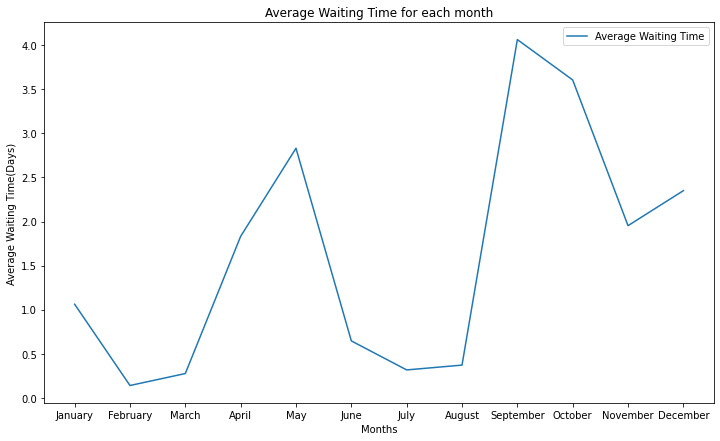

In [ ]:
# x_axis values
x_axis =mean_waiting_time_booking.index
# y_axis values
y_axis = mean_waiting_time_booking
plt.figure(figsize=(12,7))
# line plot 
plt.plot(x_axis,y_axis, label = 'Average Waiting Time')
plt.xlabel('Months')
plt.ylabel('Average Waiting Time(Days)')
plt.title('Average Waiting Time for each month')
plt.legend()
plt.show()

###  Waiting time for Hotel bookings is more in September month followed by October

### What is most preffered Meal type ?

In [ ]:
meal_type = ['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
meal_count= confirm_bookings['meal'].value_counts()

In [ ]:
# Percentage of meal type count.
percentage_meal_count = confirm_bookings['meal'].value_counts(normalize= True)*100
percentage_meal_count

BB           76.962046
HB           12.631481
SC            8.802709
Undefined     1.177161
FB            0.426604
Name: meal, dtype: float64

Text(0.5, 1.0, 'Most demandding Meal Types')

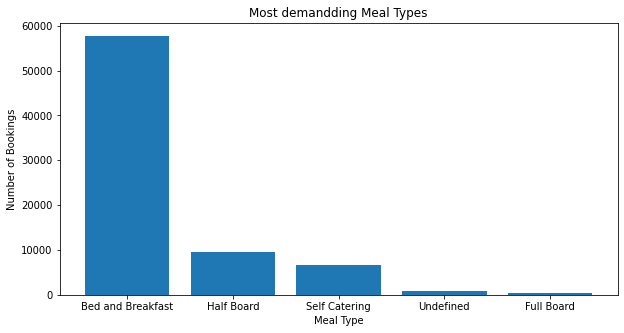

In [ ]:
# Visualisation of percentage meal count
plt.figure(figsize=(10,5))
plt.bar(meal_type, meal_count)
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.title('Most demandding Meal Types')

### Bed and Breakfast id most preffered meal

### Which segment brings in the most of the bookings?

In [ ]:
# Different market segments and their total counts in the dataset.
market_segment_booking = hotel_df['market_segment'].value_counts()
market_segment_booking

Online TA        56407
Offline TA/TO    24182
Groups           19791
Direct           12581
Corporate         5282
Complementary      728
Aviation           235
Name: market_segment, dtype: int64

In [ ]:
# Making a dictionary with these market segment data.
d = dict(market_segment_booking)
print(d)
print(list(d.keys()))
print(list(d.values()))

{'Online TA': 56407, 'Offline TA/TO': 24182, 'Groups': 19791, 'Direct': 12581, 'Corporate': 5282, 'Complementary': 728, 'Aviation': 235}
['Online TA', 'Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation']
[56407, 24182, 19791, 12581, 5282, 728, 235]


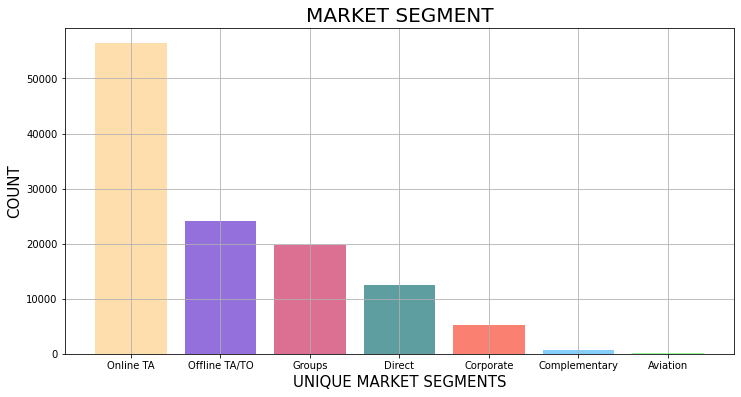

In [ ]:
# Visualisation market segment data using scatter plot.
plt.figure(figsize=(12,6))
plt.bar(list(d.keys()),list(d.values()),color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.title('MARKET SEGMENT',fontsize = 20)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('UNIQUE MARKET SEGMENTS',fontsize = 15)
plt.grid(True)
plt.show()

### Bar plot clearly conveys that 'Online TA' have the highest total count.

### which is the most preffered number of nights?

In [ ]:
# Total nights both on week days as well as week ends
confirm_bookings['Total_night_stays'] = confirm_bookings['stays_in_weekend_nights'] +confirm_bookings['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# check for total_nights counts 
total_nights_count = confirm_bookings['Total_night_stays'].value_counts()
total_nights_count.head(16).sort_index()

0       622
1     15734
2     15471
3     15717
4     11015
5      5109
6      2316
7      5679
8       714
9       527
10      779
11      273
12      122
13       90
14      656
15       37
Name: Total_night_stays, dtype: int64

In [ ]:
total_nights_stay = total_nights_count.head(16).sort_index()

Text(0.5, 1.0, 'Hotel Bookings across the contries')

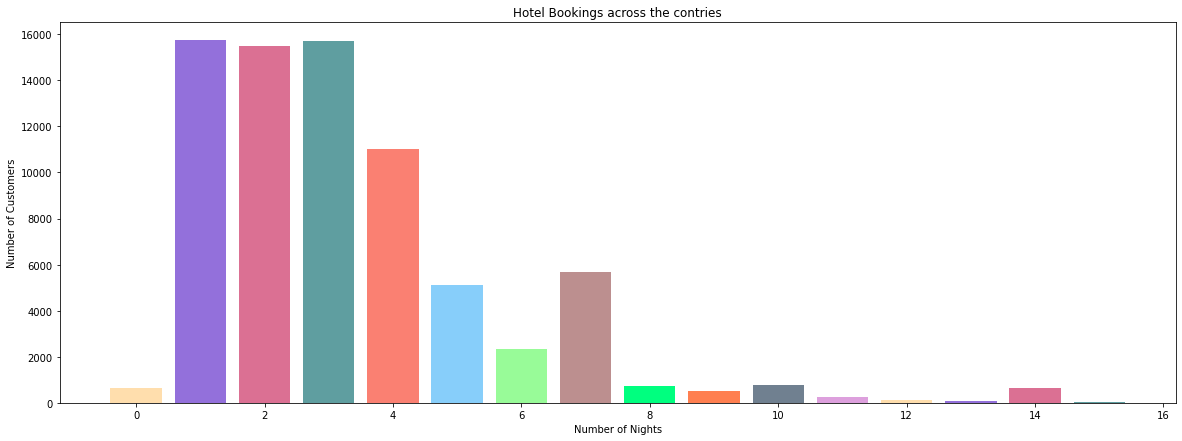

In [ ]:
plt.figure(figsize=(20,7))
plt.bar(total_nights_stay.index,total_nights_stay,color = ['navajowhite','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Number of Nights')
plt.ylabel('Number of Customers')
plt.title('Hotel Bookings across the contries')

### Most preffered number of nights stay is 1,2 and 3 Nights

### What is the mean ADR values for month of each year ?

#### Average daily rate (ADR) is an important indicator because it reflects the average price that customers are paying for hotel rooms on a given period of time.

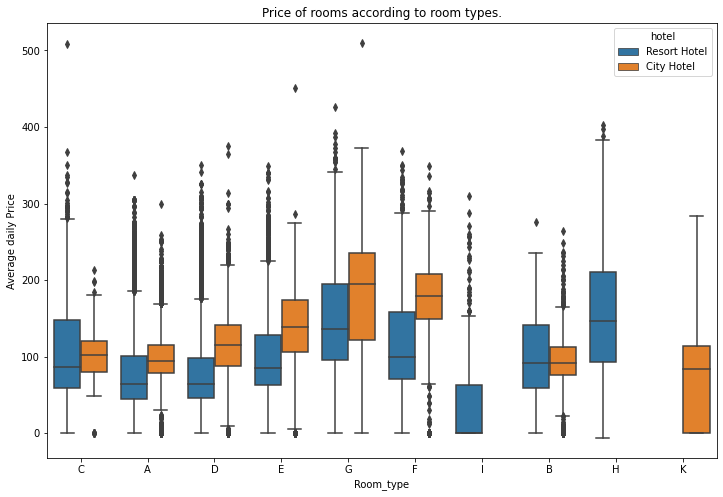

In [ ]:
# Visualisation.
plt.figure(figsize=(12,8))
sns.boxplot(x='assigned_room_type',y='adr',data=confirm_bookings,hue='hotel')
plt.title('Price of rooms according to room types.')
plt.xlabel('Room_type')
plt.ylabel('Average daily Price')
plt.show()

#### We can observe that room type 'G' of City hotel has highest mean rates among all. In resort hotels room type 'H' has highest mean rate.

In [ ]:
# Average ADR of different months and year.
adr_month_year= hotel_df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year.unstack()

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,88.942938,111.528512
August,106.165406,143.070508,164.315096
December,74.257257,86.671602,NaN
February,NaN,70.214125,76.981300
January,NaN,64.767656,73.930417
July,97.904852,125.797757,143.100379
June,NaN,107.017760,125.902174
March,NaN,79.150664,82.572362
May,NaN,96.433525,119.485098


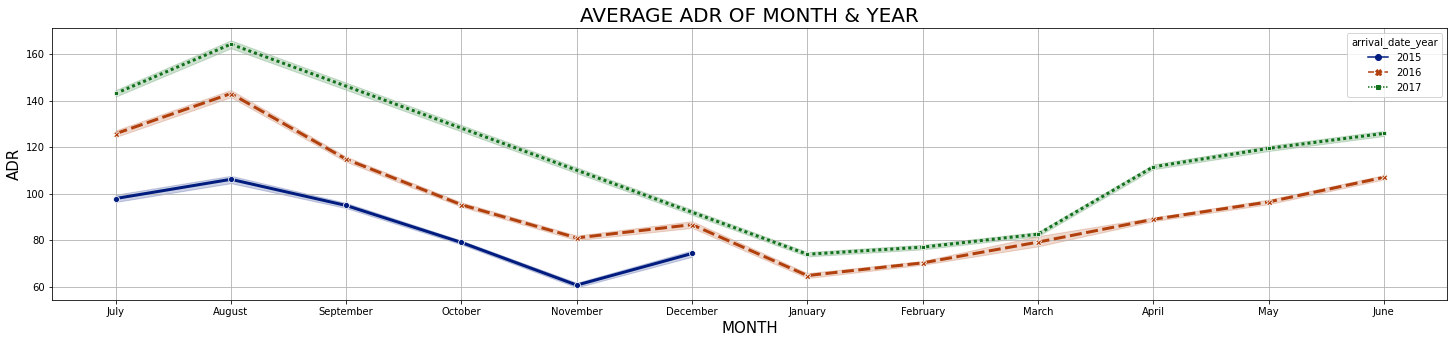

In [ ]:
# Visualisation.
line,ax = plt.subplots(figsize=(25,5)) 
sns.lineplot(x='arrival_date_month',y='adr',data=hotel_df,hue='arrival_date_year',style='arrival_date_year',markers=True,palette='dark',linewidth=3)
ax.set_title('AVERAGE ADR OF MONTH & YEAR', fontsize=20)
ax.set_xlabel ('MONTH',fontsize=15)
ax.set_ylabel ('ADR',fontsize=15)
plt.grid(True)
plt.show()

### We can observe that average daily count rate has decreasing trend after having peak value in August. This decreasing trend continues till month of January and after month of January ADR starts to increase and this trend is again observed till the month of August. Also on comaparing year wise we notice that each year ADR has been consistently increasing.

### lets check Correleation of all features 

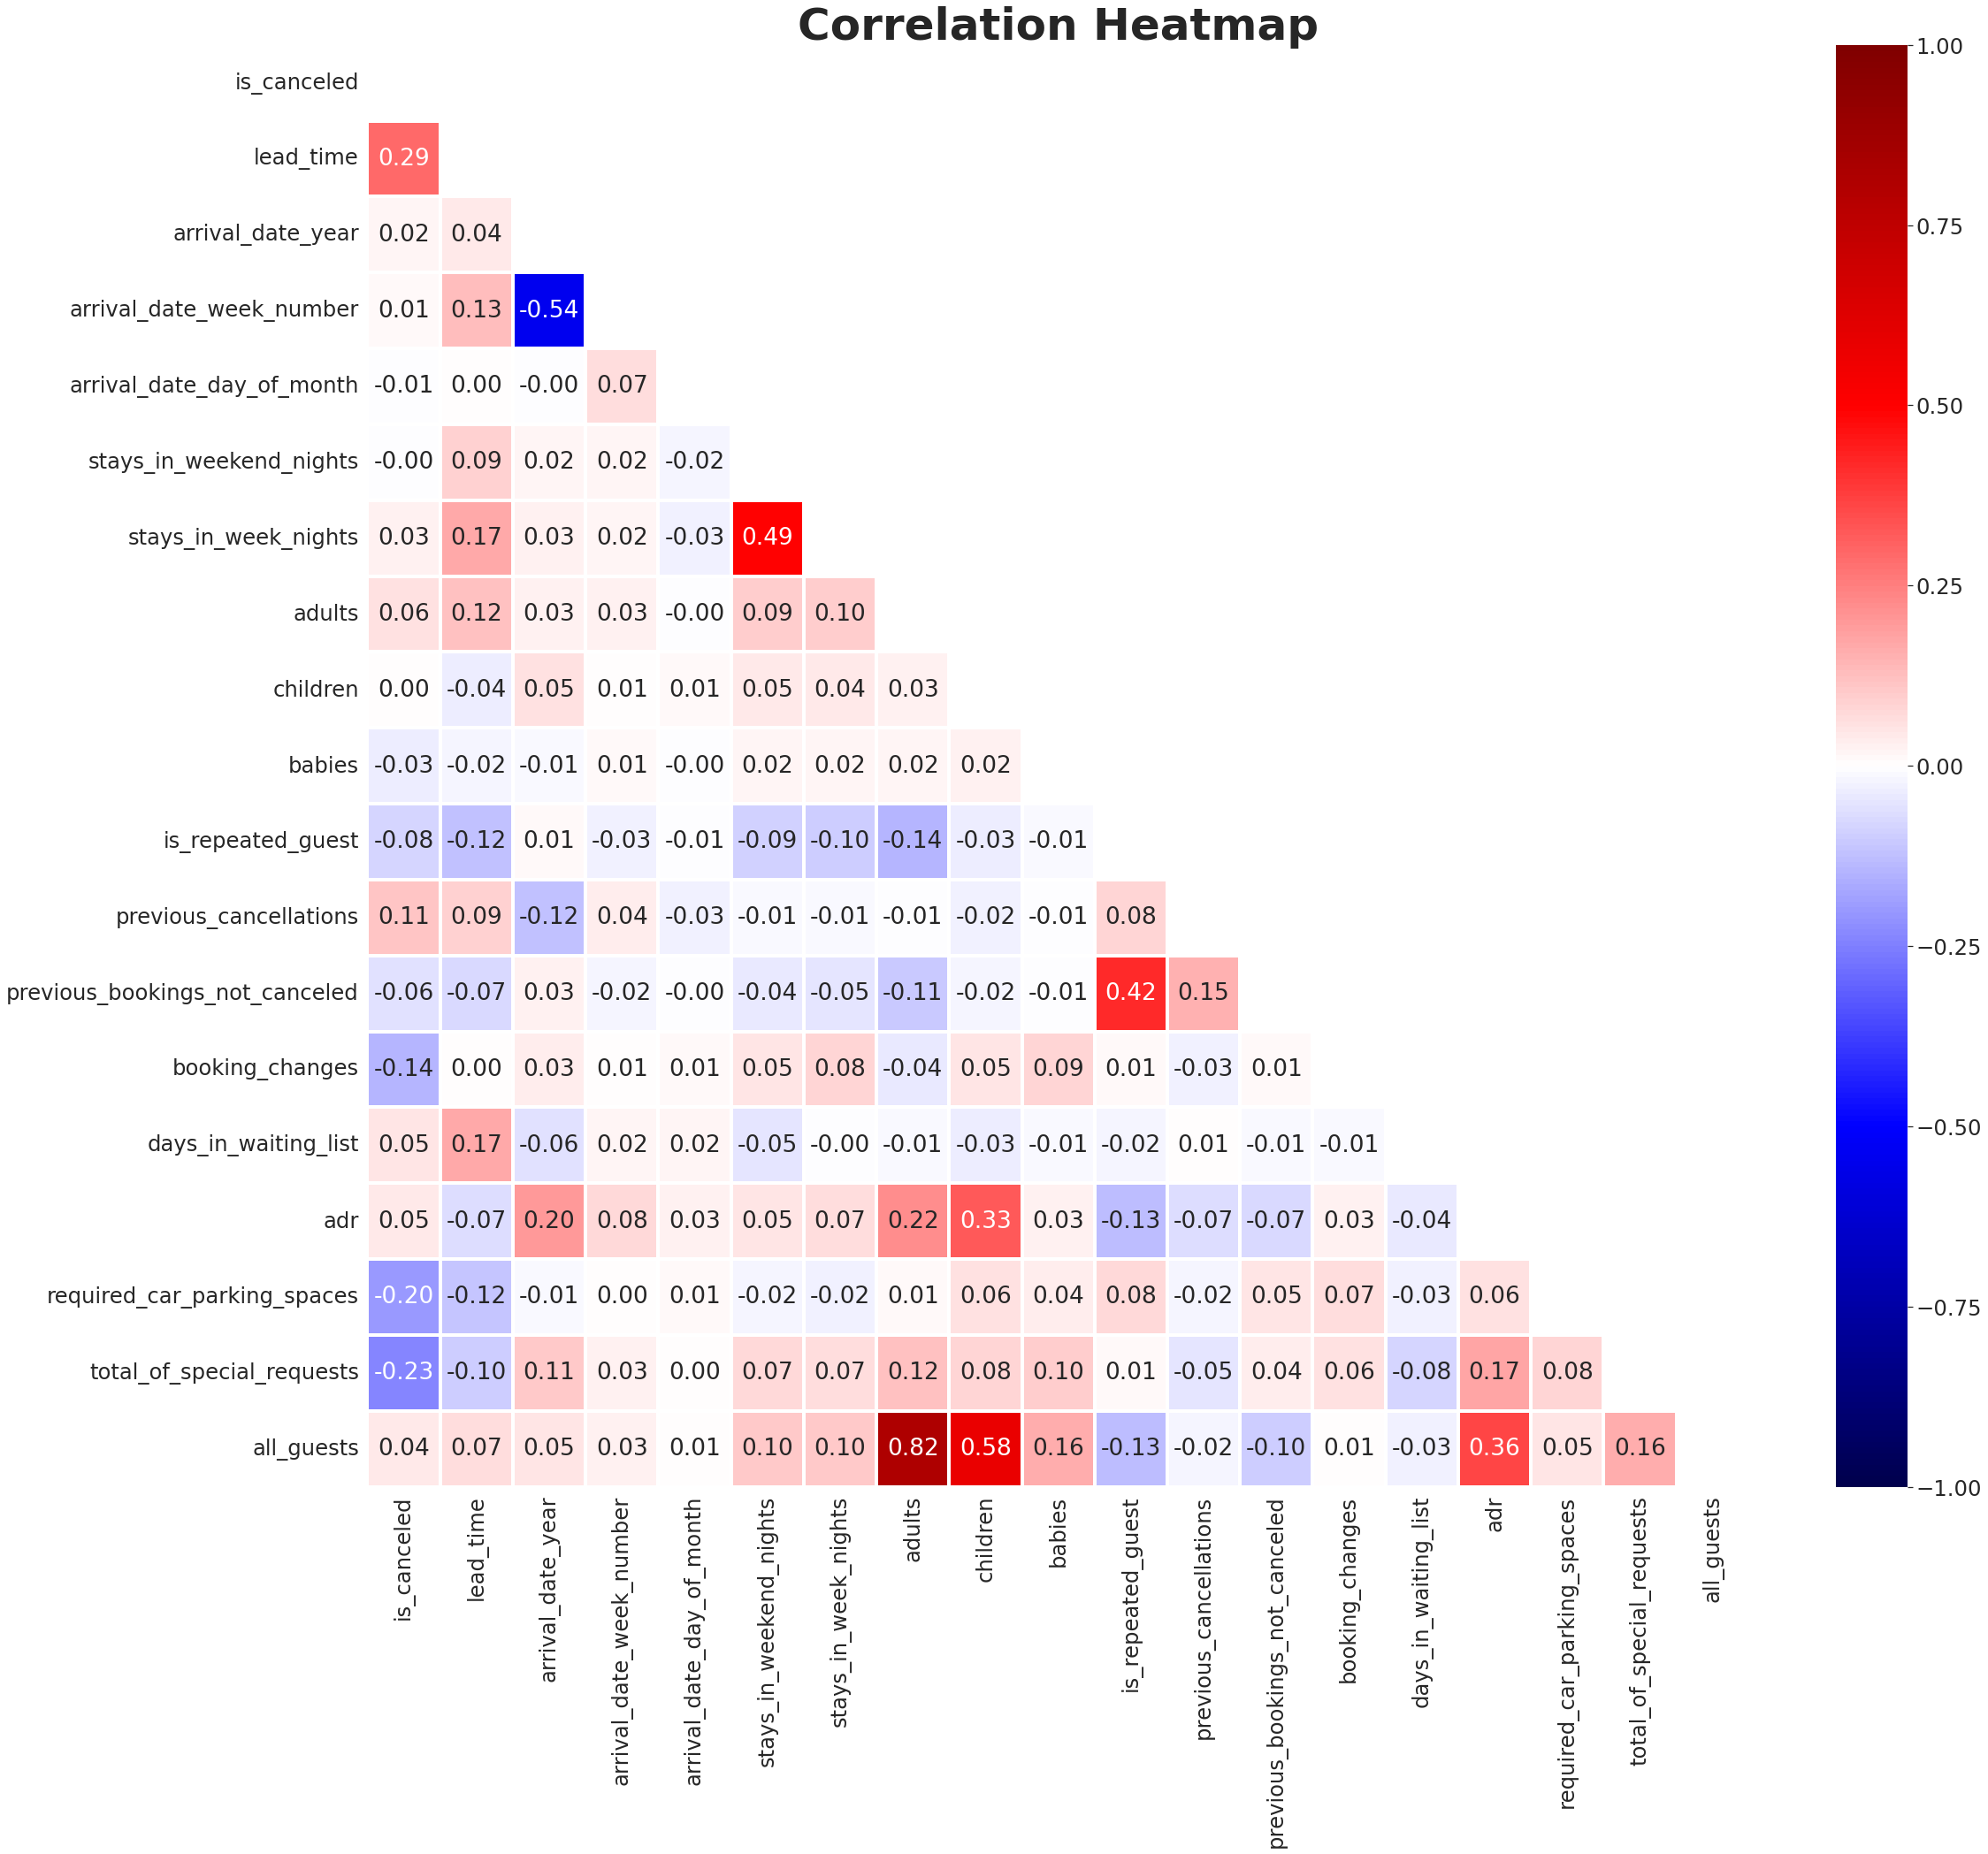

In [ ]:
corr_matrix = hotel_df.corr()
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')


###Correlation Conclusion:
###1. It can be observed arrival_date_week_number and arrival_date_year are 54% negative correlated
###2. previous_bookings_not_cancelled and is_repeated_guest are 42% positive correleated
###3. adr and children are positive correlated by 33%

## Final Conclusions:
###1) 'City hotels' and 'Resort hotels' are two types of hotels present in the dataset, out of which, 'City hotels'are more preffered by the customers than the latter. (66.4% customer prefers 'City hotels' whereas 33.6% customer prefers 'Resort hotels').

###2) Out of all months, 'August' witnessed highest number of hotel bookings whereas 'January' witnessed the least.

###3) Among all the countries in the dataset, PRT(Portugal) has got the maximum number of hotel bookings.

###4) Its observed that 'City hotels' was more cancelled as compared to 'Resort hotels'.

###5) Coming to the analysis of market segment, 'Online TA' brings maximum bookings.

###6) Considering all the three years, 'August' has got the highest average ADR in each year.

###7) After analysing the meal data, its found that 77.3% of customers prefers BB(Bread & Breakfast)

###8) We can observe that room type 'G' of City hotel has highest mean rates among all.In resort hotels room type 'H' has highest mean rate.

###9)It is observed that average daily count rate has decreasing trend after having peak value in August. This decreasing trend continues till month of January and after month of January ADR starts to increase and this trend is again observed till the month of August.

###10) Also on comaparing year wise we notice that each year ADR has been consistently increasing.